In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from joblib import dump
%matplotlib inline

#### Подготовка данных

In [2]:
data = pd.read_csv('stend_data.csv')

In [3]:
# создаю новые столбцы
# там где значение критичные ставлю 1, в ином случае 0
data['vibro_danger'] = data.apply(lambda x: 1 if x['vibro'] < 1020 else 0, axis=1)
data['oxygen_danger'] = data.apply(lambda x: 1 if x['oxygen'] > 390 else 0, axis=1)
data['temperature_danger'] = data.apply(lambda x: 1 if x['temperature'] <= 4 else 0, axis=1)

In [4]:
data

,date,vibro,oxygen,temperature,vibro_danger,oxygen_danger,temperature_danger
0,1657886906,1023,373,61,0,0,0
1,1657886909,1023,371,67,0,0,0
2,1657886912,1023,366,65,0,0,0
3,1657886915,1023,361,60,0,0,0
4,1657886918,1023,357,53,0,0,0
...,...,...,...,...,...,...,...
853,1657888682,1023,398,4,0,1,1
854,1657888684,1023,398,4,0,1,1
855,1657888686,1023,407,4,0,1,1
856,1657888688,1023,472,4,0,1,1


In [5]:
# три модели
vibro_model = DecisionTreeClassifier(criterion='entropy', random_state=2022)
oxygen_model = DecisionTreeClassifier(criterion='entropy', random_state=2022)
temperature_model = DecisionTreeClassifier(criterion='entropy', random_state=2022)

In [6]:
# дропаем столбец времени, он не нужен
data = data.drop('date', axis=1)

In [7]:
data

,vibro,oxygen,temperature,vibro_danger,oxygen_danger,temperature_danger
0,1023,373,61,0,0,0
1,1023,371,67,0,0,0
2,1023,366,65,0,0,0
3,1023,361,60,0,0,0
4,1023,357,53,0,0,0
...,...,...,...,...,...,...
853,1023,398,4,0,1,1
854,1023,398,4,0,1,1
855,1023,407,4,0,1,1
856,1023,472,4,0,1,1


TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00         5

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       1.00      1.00      1.00        14

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643



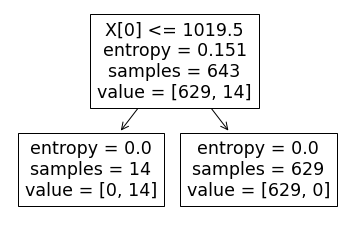

In [8]:
# дропаю таргет
X = data.drop(['vibro_danger', 'oxygen_danger', 'temperature_danger'], axis=1)
y = data['vibro_danger']
# разделяю данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)
# тренировка
vibro_model.fit(X_train, y_train)
# отрисовка дерева
plot_tree(vibro_model)
# 
y_train_pred = vibro_model.predict(X_train)
y_test_pred = vibro_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

#### Тренировка модели для кислорода

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00         6

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00        18

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643



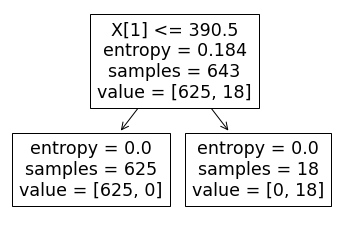

In [9]:
X = data.drop(['vibro_danger', 'oxygen_danger', 'temperature_danger'], axis=1)
y = data['oxygen_danger']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)
oxygen_model.fit(X_train, y_train)
plot_tree(oxygen_model)
y_train_pred = oxygen_model.predict(X_train)
y_test_pred = oxygen_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

#### Тренировка модели для кислорода

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        49

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00       145

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643



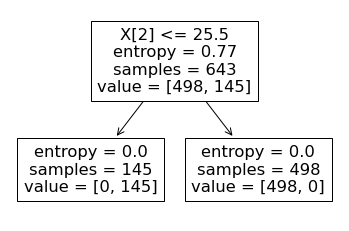

In [10]:
X = data.drop(['vibro_danger', 'oxygen_danger', 'temperature_danger'], axis=1)
y = data['temperature_danger']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)
temperature_model.fit(X_train, y_train)
plot_tree(temperature_model)
y_train_pred = temperature_model.predict(X_train)
y_test_pred = temperature_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

#### Тренировка модели для кислорода

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        49

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00       145

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643



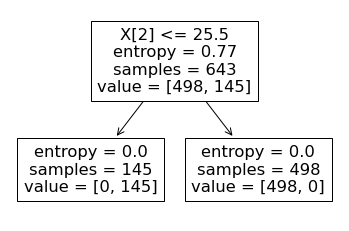

In [11]:
X = data.drop(['vibro_danger', 'oxygen_danger', 'temperature_danger'], axis=1)
y = data['temperature_danger']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)
temperature_model.fit(X_train, y_train)
plot_tree(temperature_model)
y_train_pred = temperature_model.predict(X_train)
y_test_pred = temperature_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

#### Сохранение моделей

In [12]:
dump(vibro_model, 'models/vibro_model.joblib')
dump(oxygen_model, 'models/oxygen_model.joblib')
dump(temperature_model, 'models/temperature_model.joblib')

['models/temperature_model.joblib']